In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('doordash.csv')
df = df.fillna(df.mean(numeric_only=True)) 
#df.columns

标题：城市外卖订单量分析
目的：了解各个城市的订单量，进行对比

8677


/var/folders/58/cvz5_65959ng3v20561n8nf40000gn/T/ipykernel_36108/2918237817.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


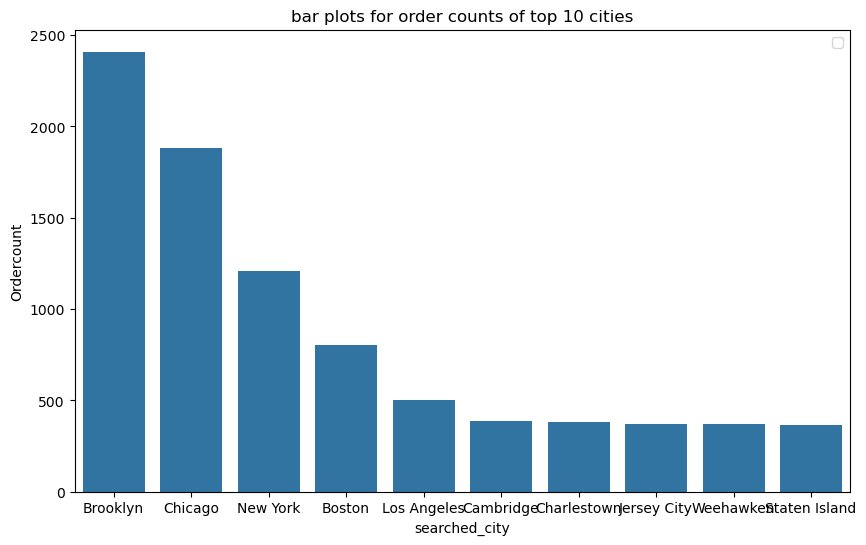

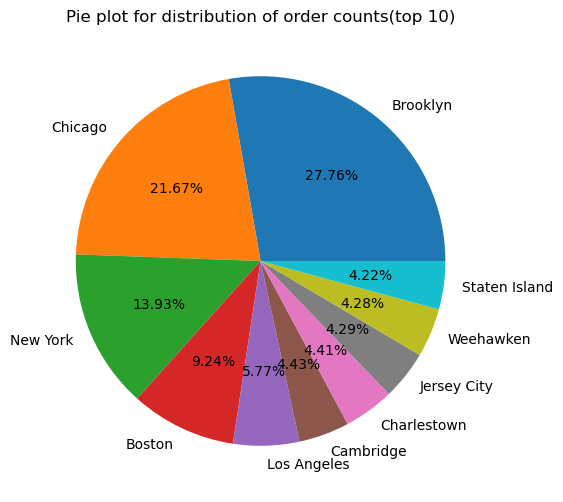

In [125]:
city_counts = df['searched_city'].value_counts().reset_index().head(10)
city_counts.columns = ['searched_city', 'Ordercount']
print(city_counts['Ordercount'].sum())
percentage = []
for i in city_counts['Ordercount']:
    percent = i/11219
    percentage.append(percent)
city_counts['Percentage'] = percentage

plt.figure(figsize=(10,6))
sns.barplot(x='searched_city', y='Ordercount', data=city_counts)
plt.title('bar plots for order counts of top 10 cities')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.pie(city_counts['Percentage'], labels=city_counts['searched_city'],autopct='%1.2f%%')
plt.title('Pie plot for distribution of order counts(top 10)')
plt.show()


part 1: 城市外卖订单量分析
--从饼图上可以看出，布鲁克林，芝加哥，和纽约的订单量依次列为前三位
--点单量需求主要集中在美国的繁华的大城市，说明外卖平台用户集中度高

个人建议：
平台可以在这些大城市多部署更多dasher资源，这样可以提高效率和大部分用户群体体验，做到合理的资源分配

In [ ]:
标题：外卖配送时间分析
目的：了解各个城市的平均外卖配送市场，为doordash提供合理的建议
问题：是否大城市因为人多，交通拥堵等原因所以送餐平均时长就长

39.43755544775856
      searched_city       mean  median   min     max
1            Revere  25.622222    25.0  16.0    39.0
2           Belmont  25.642857    25.0  16.0    39.0
3           Astoria  27.880952    27.0  15.0    40.0
4           Melrose  27.900000    25.0  13.0    64.0
5       Los Angeles  31.097804    31.0  14.0    70.0
6   Manhattan Beach  32.329317    31.0  14.0    75.0
7          Torrance  32.402439    31.0  14.0    75.0
8            Irvine  32.440000    32.0  18.0    63.0
9           Anaheim  32.462857    32.0  18.0    63.0
10          Burbank  32.591331    33.0  14.0    70.0
11      West Covina  34.854651    34.0  21.0    63.0
12         Glendale  35.803738    35.0  17.0    70.0
13         Glenview  35.890052    35.0  17.0    78.0
14       Park Ridge  36.112245    35.5  10.0    78.0
15      Charlestown  39.885117    39.0  22.0    80.0
16        Cambridge  39.971354    39.0  22.0    80.0
17           Boston  40.288030    40.0  16.0    85.0
18    Staten Island  40.3661

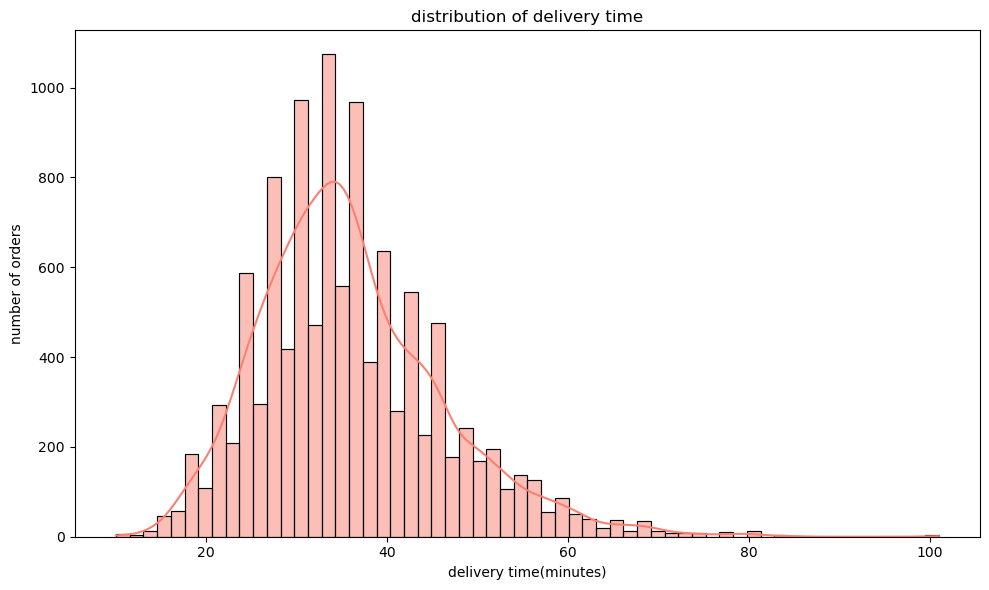

In [17]:

time_stat = df.groupby('searched_city')['delivery_time'].agg(['mean','median','min','max']).reset_index()
print(time_stat['mean'].mean())
time_stat = time_stat.sort_values(by='mean', ascending=True)
time_stat = time_stat.reset_index(drop=True)
time_stat.index = range(1, len(time_stat) + 1)
print(time_stat) 
#time_stat.to_excel("time_stat.xlsx", index=False) download to excel Form

plt.figure(figsize=(10, 6))
filtered = df[df['delivery_time'] < 120]
sns.histplot(filtered['delivery_time'], bins=60, kde=True, color='salmon')
plt.title('distribution of delivery time')
plt.xlabel('delivery time(minutes)')
plt.ylabel('number of orders')
plt.tight_layout()
#plt.savefig("my_chart.png", dpi=300, bbox_inches='tight') download the photo
plt.show()


part 2： 外卖配送时间数据统计
--从得倒的图表中得到：平均送餐最慢的三座城市依次是布鲁克林，纽约和芝加哥
--而一些我没听过的小城市都配送的比较快，其中作为全美闻名的大城市的洛杉矶（外卖订单排在第五位）的平均配送时间也很短，这令人感到好奇

个人建议：
建议doordash弄清楚为何洛杉矶和纽约，芝加哥，布鲁克林都作为大城市，开始洛杉矶的配送速度却可以快很多，建议doordash根据其原因尽快调整在布鲁克林，纽约和芝加哥的送餐策略和部署

Part 3
标题：哪家店的平均评分最高,哪家商店的order最多
目的：分析数据得到各家商家的平均评分，订单量等数据，为doordash提供对于各个商家的用户反馈及需求量的数据
问题：哪些商家评分低（需要doordash重点关注并进行沟通调整）

              loc_name      mean  count
1             7-Eleven  4.650000     26
2              Dunkin'  4.613636     22
3   The Ice Cream Shop  4.575000     24
4               Subway  4.517241     29
5            Walgreens  4.509375     32
6             Chipotle  4.427273     22
7                  CVS  4.406452     31
8            Taco Bell  4.404545     22
9           McDonald's  4.397143     35
10      Baskin-Robbins  4.300000     23
11                 KFC  4.247826     23
12         Burger King  4.228125     32
13             Popeyes  4.222727     22
14             Wendy's  4.213636     22


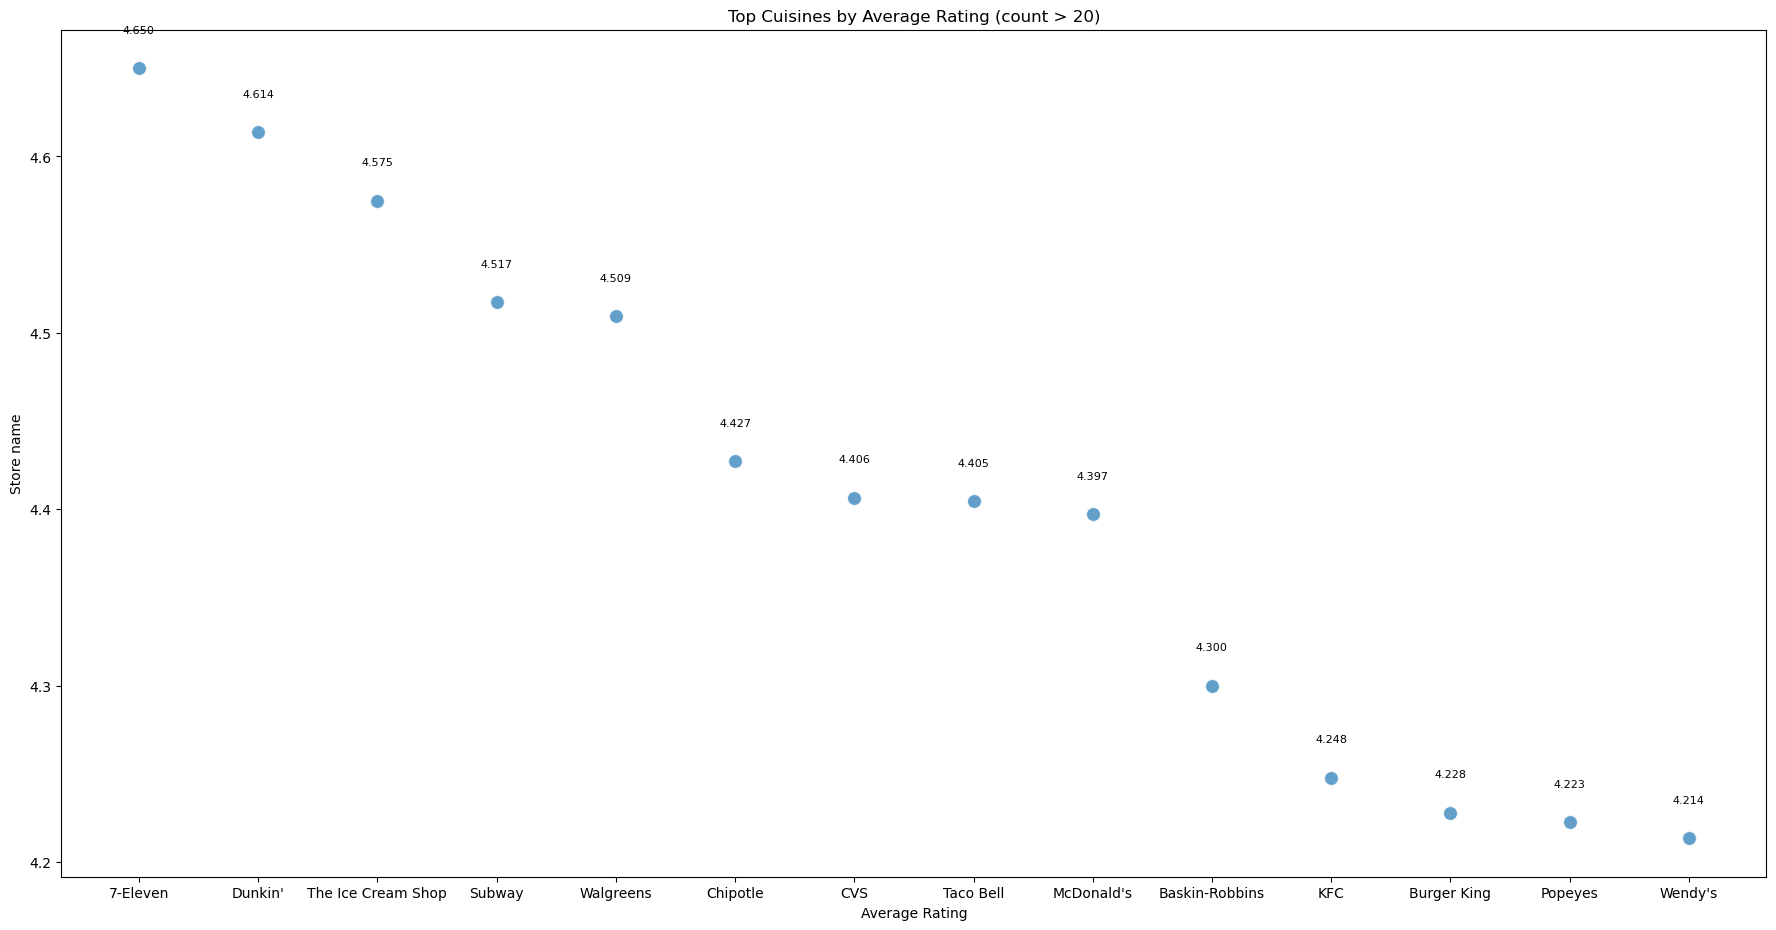

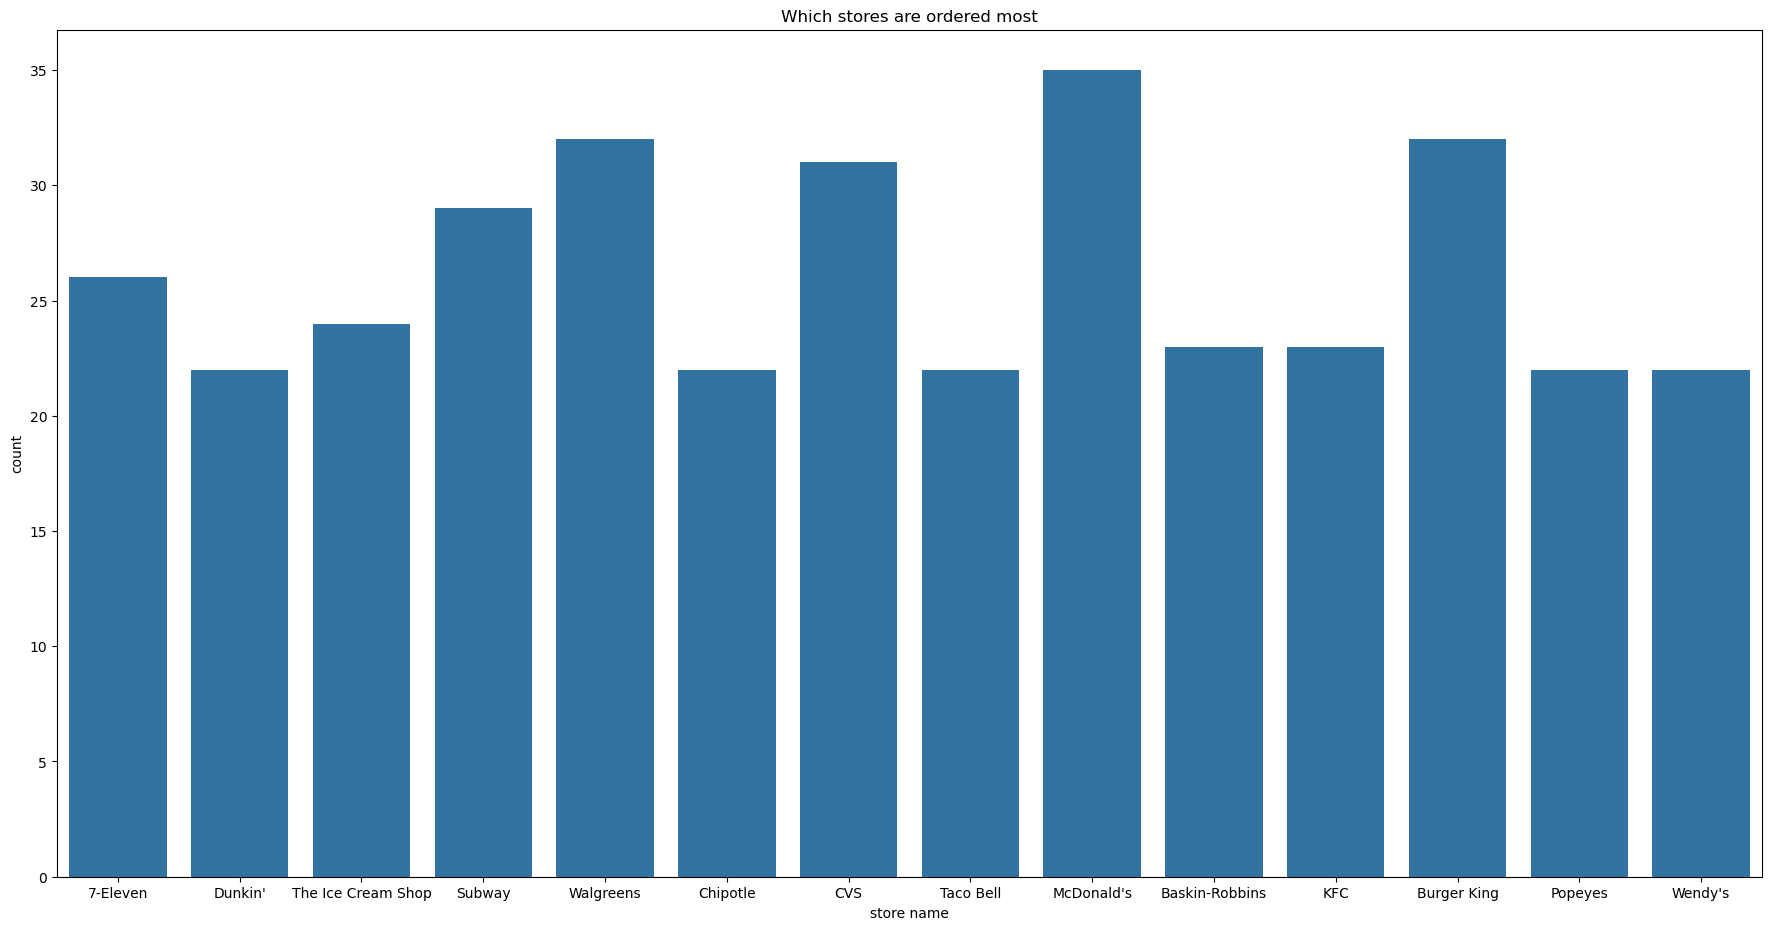

In [134]:
Rest= df.groupby('loc_name')['review_rating'].agg(['mean', 'count']).reset_index()
Rest = Rest[Rest['count'] > 20]
Rest = Rest.sort_values(by='mean', ascending=False)
Rest.index = range(1, len(Rest) + 1)
print(Rest)

count_of_cuisines = cuisines.sort_values(by='count', ascending=False)
count_of_cuisines = count_of_cuisines.reset_index()
count_of_cuisines.index = range(1, len(cuisines) + 1)

plt.figure(figsize=(22,11))
sns.scatterplot(data=Rest, x='loc_name', y='mean',s=100,alpha=0.7)
for x, y in zip(Rest['loc_name'], Rest['mean']):
    plt.text(x, y+0.02, f"{y:.3f}", ha='center', fontsize=8)
plt.title('Top Cuisines by Average Rating (count > 20)')
plt.xlabel('Average Rating')
plt.ylabel('Store name')
plt.show()

plt.figure(figsize=(22,11))
sns.barplot(data=Rest, y='count', x='loc_name')
plt.title('Which stores are ordered most')
plt.xlabel('store name')
plt.ylabel('count')
plt.show()

part 3: 商店/餐馆的平均评分和点单次数分析
数据发现：（点单量超过20的商家中）
从图表可知，711的评分最高，Wendy's 评分最低，KFC, Burger king, Popeyes的评分都排在末尾
麦当劳的外卖订单是最多的，然后依次是Walgreens, Burger king.

个人建议：
通过各种方式，查明为什么全美的大型汉堡炸鸡店的评分都很低。将其原因上报给商家，与商家协商改进，为我们的用户提供更好的消费体验。

主题：送餐速度是否影响评分分析
目的：研究送餐速度是否对订单评分造成较重影响
问题：送餐速度与订单评分的相关性的图像分布长什么样？

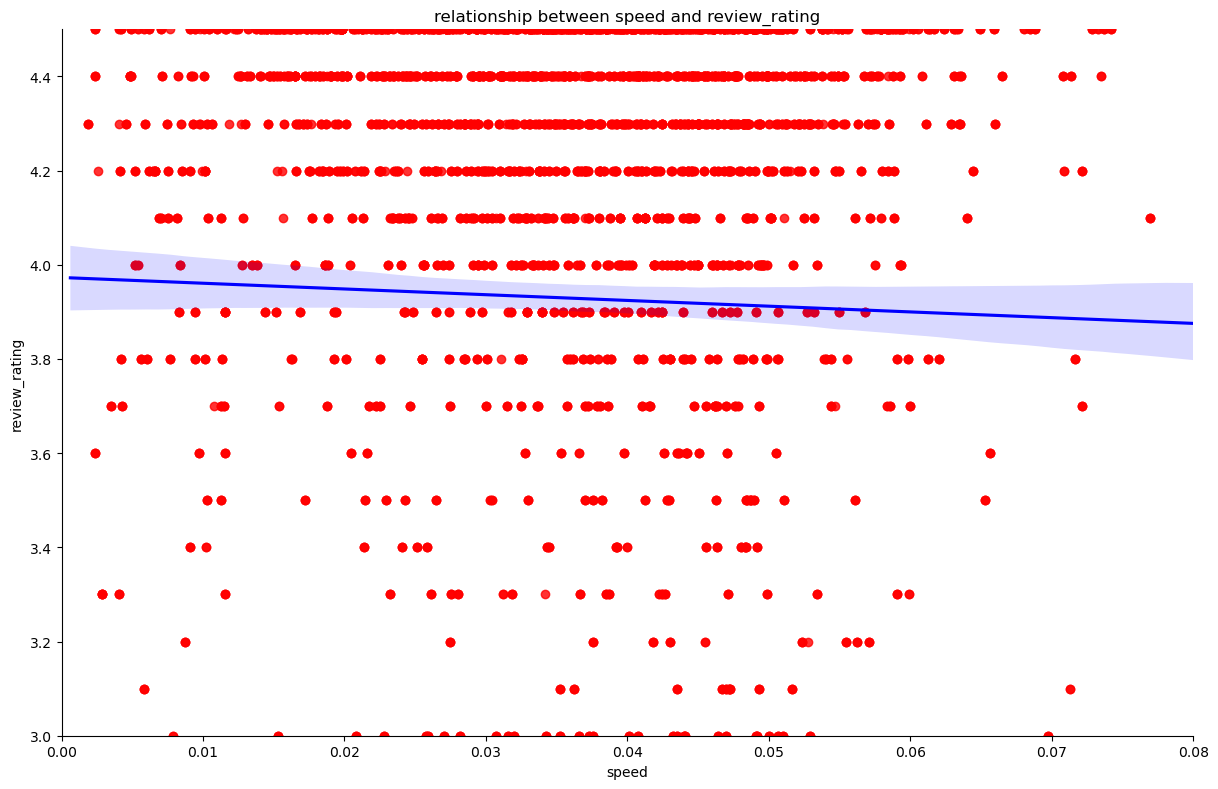

In [141]:

df['speed'] = df['distance']/df['delivery_time']
df_fil = df.query('delivery_time < 120')
#print(df.fil.head(3))
sns.lmplot(data=df_fil, x='speed', y='review_rating', height=8, aspect=1.5,scatter_kws={'alpha':0.8, 'color':'Red'}, line_kws={'color':'blue'})
plt.title('relationship between speed and review_rating')
plt.tight_layout()
plt.xlim(0,0.08)
plt.ylim(3,4.5)
plt.show()

Part 4: 配送速度与评分高低的关系
图表发现：
1.从我画出的这条回归线，它表示出配送速度和rating的直接关系.这条回归线的斜率为负的，但却看起来十分平坦，说明其实配送速度和评分并没有太大的关系。甚至配送速度越快，顾客评分反而略微下降。
2.说明顾客评分更关心其他因素，比如餐食质量、。与送餐员送餐快慢并没有太大关系。

个人建议：
1. 平台在研究用户对每单订单的评分，可以不那么关注送餐速率，反而可以着重参考商家的餐品品质等等，尤其是是之前提及过的全美各大炸鸡汉堡店，他们的评分都较低